In [125]:
using MAT 
using GeoStats
using DataFrames
using Plots; gr();
using Random
using Distances

In [3]:
ign = matread("../resources/igncn1.mat");

In [223]:
n = 1000
filter = .! isnan.(ign["Latitude"])
idx = sample(1:sum(filter), n)
d = DataFrame(hcat(ign["SiO2"][filter], 
        ign["Latitude"][filter] .+ (randn(sum(filter)) .* .1/100), # avoid varg errors for identical coords
        ign["Longitude"][filter] .+ (randn(sum(filter)) .* .1/100)), 
    ["SiO2", "Latitude", "Longitude"])
# d = DataFrame(hcat(ign["SiO2"][filter][idx], 
#         (ign["Latitude"][filter][idx] .+ 90 .+ (randn(n).*.1/100)), # avoid varg errors for identical coords
#         (ign["Longitude"][filter][idx] .+ 180 .+ (randn(n).*.1/100))), 
#     ["SiO2", "Latitude", "Longitude"])

# In degrees 
# d = DataFrame(hcat(ign["SiO2"][filter][idx], 
#         (ign["Latitude"][filter][idx] .+ (randn(n).*.1/100)), # avoid varg errors for identical coords
#         (ign["Longitude"][filter][idx] .+ (randn(n).*.1/100))), 
#     ["SiO2", "Latitude", "Longitude"])
dgeo = georef(d, (:Latitude,:Longitude))

68042 GeoData{2,Float64}
  variables
    └─SiO2 (Float64)
  domain: 68042 PointSet{2,Float64}

In [224]:
varg = EmpiricalVariogram(dgeo, :SiO2, distance=Haversine(6371), maxlag=200, algo=:ball)
#varg = EmpiricalVariogram(dgeo, :SiO2, maxlag=5)

┌ Warning: :ball algorithm requires Minkowski metric
└ @ Variography /Users/gailin/.julia/packages/Variography/FjEIK/src/empirical.jl:73


EmpiricalVariogram
  abscissa: (2.9901886609615014, 194.9634743828839)
  ordinate: (43.96742476171441, 97.62544143103258)
  N° pairs: 32328996

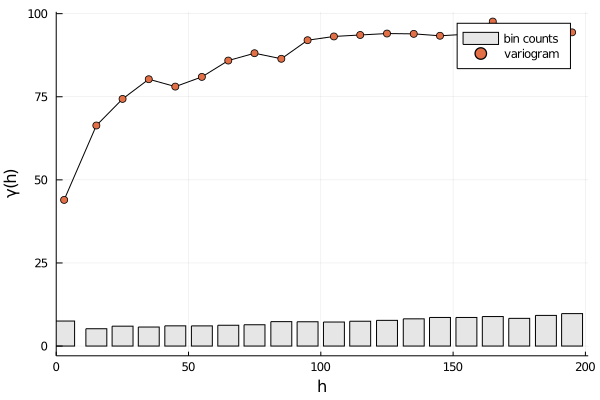

In [225]:
plot(varg)

(:abscissa, :ordinate, :counts, :distance)


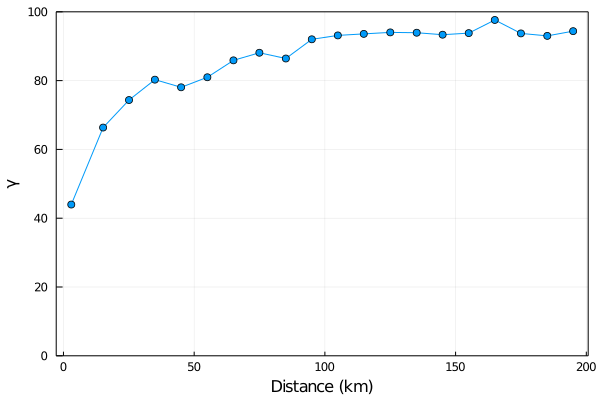

In [274]:
println(fieldnames(typeof(varg)))

plot(varg.abscissa, varg.ordinate, marker=true, legend=false, 
    ylabel="γ", xlabel="Distance (km)", framestyle=:box, ylims=(0,100))
#savefig("viz/sample_correlation.png")

In [233]:
include("../src/utilities.jl")

areaAverage

In [267]:
blat, blong, bval = areaAverage(ign["Latitude"][:], ign["Longitude"][:], ign["SiO2"][:]);
d = DataFrame(hcat(bval, 
        blat .+ randn(length(blat)).* .1/100, 
        blong.+ randn(length(blat)).* .1/100), 
    ["SiO2", "Latitude", "Longitude"])
dgeo_avg = georef(d, (:Latitude,:Longitude))

2772 GeoData{2,Float64}
  variables
    └─SiO2 (Float64)
  domain: 2772 PointSet{2,Float64}

In [268]:
varg_avg = EmpiricalVariogram(dgeo_avg, :SiO2, distance=Haversine(6371), 
    maxlag=1500, algo=:ball)

┌ Warning: :ball algorithm requires Minkowski metric
└ @ Variography /Users/gailin/.julia/packages/Variography/FjEIK/src/empirical.jl:73


EmpiricalVariogram
  abscissa: (39.82946312908948, 1459.3989255199108)
  ordinate: (47.239536171894336, 64.53947395862907)
  N° pairs: 219697

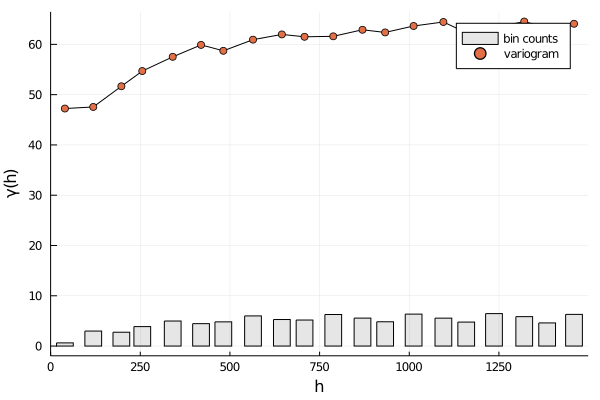

In [269]:
plot(varg_avg)

In [277]:
plot(varg_avg.abscissa, varg_avg.ordinate, marker=true, legend=false, 
    ylabel="γ", xlabel="Distance (km)", framestyle=:box, ylims=(0,70))
savefig("viz/area_avg_correlation.png")